In [23]:
%load_ext autoreload
%autoreload 2
from pangolin import *
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# data
num_schools = 8
y_obs = [28, 8, -3, 7, -1, 1, 18, 12]
σ = [15, 10, 16, 11, 9, 11, 10, 18]

In [25]:
# model, centered version
μ = normal(0,10)
τ = exp(normal(5,1))
θ = [normal(μ,τ) for i in range(num_schools)]
y = [normal(θi,σi) for (θi,σi) in zip(θ,σ)]

In [26]:
# inference using numpyro
calc = Calculate("numpyro",niter=10000)
[μs, τs, θs] = calc.sample([μ,τ,θ],y,y_obs)
print("mean θ", np.mean(θs,axis=1))
print("std  θ", np.var(θs,axis=1))

mean θ [14.89  7.21  2.81  6.65  1.92  3.39 12.85  7.8 ]
std  θ [117.42  61.77 109.45  71.48  57.55  73.04  65.31 115.11]


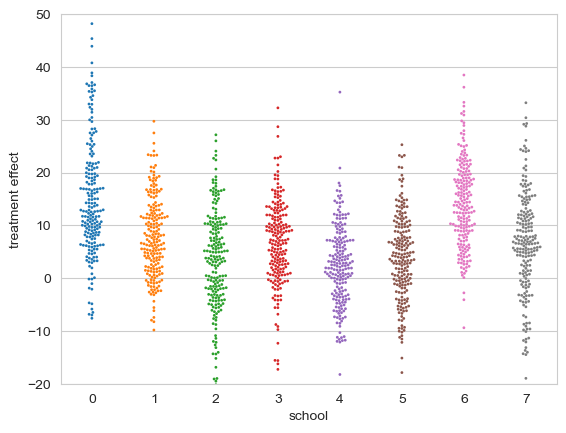

In [27]:
# plot
sns.swarmplot(np.array(θs)[:,::50].T,s=2)
plt.xlabel('school')
plt.ylabel('treatment effect')
plt.ylim([-20,50]);

In [28]:
# inference using jags
calc = Calculate("jags",niter=10000)
[μs, τs, θs] = calc.sample([μ,τ,θ],y,y_obs)
print("mean θ", np.mean(θs,axis=1))
print("std  θ", np.var(θs,axis=1))

mean θ [15.04  7.24  2.81  6.55  1.78  3.31 12.98  8.26]
std  θ [117.81  61.08 110.19  70.03  55.21  73.14  66.52 120.34]


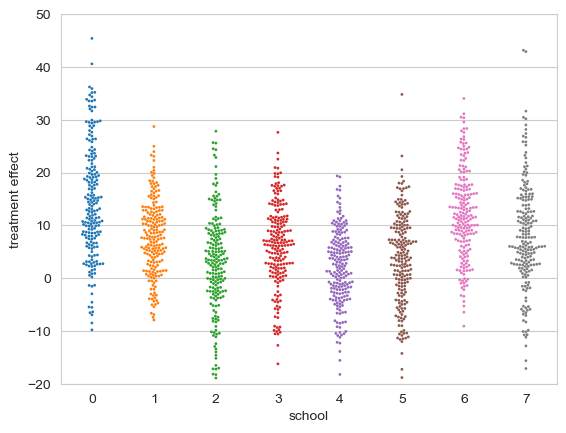

In [30]:
# plot jags inference
sns.swarmplot(np.array(θs)[:,::50].T,s=2)
plt.xlabel('school')
plt.ylabel('treatment effect')
plt.ylim([-20,50]);